# Cat Dog Image Classification

In this challenge, we classify images of dogs and cats using Tensorflow 2.0 and Keras to create a convolutional neural network that correctly classifies images of cats and dogs at least 63% of the time.

https://towardsdatascience.com/easy-image-classification-with-tensorflow-2-0-f734fee52d13
https://colab.research.google.com/drive/15Cyy2H7nT40sGR7TBN5wBvgTd57mVKay?usp=sharing

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This is not working. Getting 403 code. Try wget instead.
#URL = 'https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip'
#path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=URL, extract=True)

In [10]:

!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip


--2020-10-15 11:41:56--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘cats_and_dogs.zip.1’

cats_and_dogs.zip.1     [    <=>             ]  67.43M  2.31MB/s    in 30s     

2020-10-15 11:42:26 (2.25 MB/s) - ‘cats_and_dogs.zip.1’ saved [70702765]

Archive:  cats_and_dogs.zip
   creating: cats_and_dogs/
  inflating: cats_and_dogs/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/cats_and_dogs/
  inflating: __MACOSX/cats_and_dogs/._.DS_Store  
   creating: cats_and_dogs/test/
  inflating: cats_and_dogs/test/48.jpg  
   creating: __MACOSX/cats_and_dogs/test/
  inflating: __MACOSX/cats_and_dogs/test/._48.jpg  
  inflating: cats_and_dogs/test/49.jpg  
  inflating: __MACOSX/

  inflating: cats_and_dogs/train/dogs/dog.34.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.34.jpg  
  inflating: cats_and_dogs/train/dogs/dog.20.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.20.jpg  
  inflating: cats_and_dogs/train/dogs/dog.165.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.165.jpg  
  inflating: cats_and_dogs/train/dogs/dog.603.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.603.jpg  
  inflating: cats_and_dogs/train/dogs/dog.617.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.617.jpg  
  inflating: cats_and_dogs/train/dogs/dog.171.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.171.jpg  
  inflating: cats_and_dogs/train/dogs/dog.398.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.398.jpg  
  inflating: cats_and_dogs/train/dogs/dog.429.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.429.jpg  
  inflating: cats_and_dogs/train/dogs/dog.401.jpg  
  inflating: __MACOSX/cats_and_d

  inflating: cats_and_dogs/train/dogs/dog.448.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.448.jpg  
  inflating: cats_and_dogs/train/dogs/dog.104.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.104.jpg  
  inflating: cats_and_dogs/train/dogs/dog.662.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.662.jpg  
  inflating: cats_and_dogs/train/dogs/dog.69.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.69.jpg  
  inflating: cats_and_dogs/train/dogs/dog.676.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.676.jpg  
  inflating: cats_and_dogs/train/dogs/dog.110.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.110.jpg  
  inflating: cats_and_dogs/train/dogs/dog.138.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.138.jpg  
  inflating: cats_and_dogs/train/dogs/dog.55.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.55.jpg  
  inflating: cats_and_dogs/train/dogs/dog.886.jpg  
  inflating: __MACOSX/cats_and_d

  inflating: cats_and_dogs/train/dogs/dog.842.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.842.jpg  
  inflating: cats_and_dogs/train/dogs/dog.856.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.856.jpg  
  inflating: cats_and_dogs/train/dogs/dog.85.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.85.jpg  
  inflating: cats_and_dogs/train/dogs/dog.103.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.103.jpg  
  inflating: cats_and_dogs/train/dogs/dog.665.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.665.jpg  
  inflating: cats_and_dogs/train/dogs/dog.671.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.671.jpg  
  inflating: cats_and_dogs/train/dogs/dog.117.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.117.jpg  
  inflating: cats_and_dogs/train/dogs/dog.881.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.881.jpg  
  inflating: cats_and_dogs/train/dogs/dog.659.jpg  
  inflating: __MACOSX/cats_and

  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.454.jpg  
  inflating: cats_and_dogs/train/dogs/dog.440.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.440.jpg  
  inflating: cats_and_dogs/train/dogs/dog.326.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.326.jpg  
  inflating: cats_and_dogs/train/dogs/dog.285.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.285.jpg  
  inflating: cats_and_dogs/train/dogs/dog.291.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.291.jpg  
  inflating: cats_and_dogs/train/dogs/dog.508.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.508.jpg  
  inflating: cats_and_dogs/train/dogs/dog.246.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.246.jpg  
  inflating: cats_and_dogs/train/dogs/dog.520.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.520.jpg  
  inflating: cats_and_dogs/train/dogs/dog.534.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.534.jpg  
  inflating: cats

  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.524.jpg  
  inflating: cats_and_dogs/train/dogs/dog.242.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.242.jpg  
  inflating: cats_and_dogs/train/dogs/dog.295.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.295.jpg  
  inflating: cats_and_dogs/train/dogs/dog.281.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.281.jpg  
  inflating: cats_and_dogs/train/dogs/dog.478.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.478.jpg  
  inflating: cats_and_dogs/train/dogs/dog.322.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.322.jpg  
  inflating: cats_and_dogs/train/dogs/dog.444.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.444.jpg  
  inflating: cats_and_dogs/train/dogs/dog.450.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.450.jpg  
  inflating: cats_and_dogs/train/dogs/dog.336.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.336.jpg  
  inflating: cats

  inflating: cats_and_dogs/train/dogs/dog.622.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.622.jpg  
  inflating: cats_and_dogs/train/dogs/dog.636.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.636.jpg  
  inflating: cats_and_dogs/train/dogs/dog.150.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.150.jpg  
  inflating: cats_and_dogs/train/dogs/dog.385.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.385.jpg  
  inflating: cats_and_dogs/train/dogs/dog.391.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.391.jpg  
  inflating: cats_and_dogs/train/dogs/dog.408.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.408.jpg  
  inflating: cats_and_dogs/train/dogs/dog.420.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.420.jpg  
  inflating: cats_and_dogs/train/dogs/dog.346.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.346.jpg  
  inflating: cats_and_dogs/train/dogs/dog.352.jpg  
  inflating: __MACOSX/cats_a

  inflating: cats_and_dogs/train/cats/cat.365.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.365.jpg  
  inflating: cats_and_dogs/train/cats/cat.371.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.371.jpg  
  inflating: cats_and_dogs/train/cats/cat.417.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.417.jpg  
  inflating: cats_and_dogs/train/cats/cat.198.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.198.jpg  
  inflating: cats_and_dogs/train/cats/cat.826.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.826.jpg  
  inflating: cats_and_dogs/train/cats/cat.832.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.832.jpg  
  inflating: cats_and_dogs/train/cats/cat.30.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.30.jpg  
  inflating: cats_and_dogs/train/cats/cat.629.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.629.jpg  
  inflating: cats_and_dogs/train/cats/cat.24.jpg  
  inflating: __MACOSX/cats_and_

  inflating: cats_and_dogs/train/cats/cat.202.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.202.jpg  
  inflating: cats_and_dogs/train/cats/cat.564.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.564.jpg  
  inflating: cats_and_dogs/train/cats/cat.1.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.1.jpg  
  inflating: cats_and_dogs/train/cats/cat.996.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.996.jpg  
  inflating: cats_and_dogs/train/cats/cat.982.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.982.jpg  
  inflating: cats_and_dogs/train/cats/cat.772.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.772.jpg  
  inflating: cats_and_dogs/train/cats/cat.766.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.766.jpg  
  inflating: cats_and_dogs/train/cats/cat.955.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.955.jpg  
  inflating: cats_and_dogs/train/cats/cat.799.jpg  
  inflating: __MACOSX/cats_and_d

  inflating: cats_and_dogs/train/cats/cat.265.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.265.jpg  
  inflating: cats_and_dogs/train/cats/cat.503.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.503.jpg  
  inflating: cats_and_dogs/train/cats/cat.517.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.517.jpg  
  inflating: cats_and_dogs/train/cats/cat.271.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.271.jpg  
  inflating: cats_and_dogs/train/cats/cat.488.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.488.jpg  
  inflating: cats_and_dogs/train/cats/cat.339.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.339.jpg  
  inflating: cats_and_dogs/train/cats/cat.311.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.311.jpg  
  inflating: cats_and_dogs/train/cats/cat.477.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.477.jpg  
  inflating: cats_and_dogs/train/cats/cat.463.jpg  
  inflating: __MACOSX/cats_a

  inflating: cats_and_dogs/train/cats/cat.883.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.883.jpg  
  inflating: cats_and_dogs/train/cats/cat.897.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.897.jpg  
  inflating: cats_and_dogs/train/cats/cat.42.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.42.jpg  
  inflating: cats_and_dogs/train/cats/cat.129.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.129.jpg  
  inflating: cats_and_dogs/train/cats/cat.896.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.896.jpg  
  inflating: cats_and_dogs/train/cats/cat.128.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.128.jpg  
  inflating: cats_and_dogs/train/cats/cat.43.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.43.jpg  
  inflating: cats_and_dogs/train/cats/cat.57.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.57.jpg  
  inflating: cats_and_dogs/train/cats/cat.882.jpg  
  inflating: __MACOSX/cats_and_dog

  inflating: cats_and_dogs/train/cats/cat.443.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.443.jpg  
  inflating: cats_and_dogs/train/cats/cat.325.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.325.jpg  
  inflating: cats_and_dogs/train/cats/cat.331.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.331.jpg  
  inflating: cats_and_dogs/train/cats/cat.457.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.457.jpg  
  inflating: cats_and_dogs/train/cats/cat.319.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.319.jpg  
  inflating: cats_and_dogs/train/cats/cat.480.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.480.jpg  
  inflating: cats_and_dogs/train/cats/cat.494.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.494.jpg  
  inflating: cats_and_dogs/train/cats/cat.537.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.537.jpg  
  inflating: cats_and_dogs/train/cats/cat.251.jpg  
  inflating: __MACOSX/cats_a

  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.740.jpg  
  inflating: cats_and_dogs/train/cats/cat.998.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.998.jpg  
  inflating: cats_and_dogs/train/cats/cat.595.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.595.jpg  
  inflating: cats_and_dogs/train/cats/cat.581.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.581.jpg  
  inflating: cats_and_dogs/train/cats/cat.218.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.218.jpg  
  inflating: cats_and_dogs/train/cats/cat.556.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.556.jpg  
  inflating: cats_and_dogs/train/cats/cat.230.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.230.jpg  
  inflating: cats_and_dogs/train/cats/cat.224.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.224.jpg  
  inflating: cats_and_dogs/train/cats/cat.542.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.542.jpg  
  inflating: cats

  inflating: cats_and_dogs/train/cats/cat.815.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.815.jpg  
  inflating: cats_and_dogs/train/cats/cat.801.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.801.jpg  
  inflating: cats_and_dogs/train/cats/cat.632.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.632.jpg  
  inflating: cats_and_dogs/train/cats/cat.154.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.154.jpg  
  inflating: cats_and_dogs/train/cats/cat.140.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.140.jpg  
  inflating: cats_and_dogs/train/cats/cat.626.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.626.jpg  
  inflating: cats_and_dogs/train/cats/cat.168.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.168.jpg  
  inflating: cats_and_dogs/train/cats/cat.17.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.17.jpg  
  inflating: cats_and_dogs/train/cats/cat.16.jpg  
  inflating: __MACOSX/cats_and_

  inflating: cats_and_dogs/validation/dogs/dog.2463.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2463.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2477.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2477.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2311.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2311.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2488.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2488.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2489.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2489.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2476.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2476.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2310.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2310.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2304.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/.

  inflating: cats_and_dogs/validation/dogs/dog.2028.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2028.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2000.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2000.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2014.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2014.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2202.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2202.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2216.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2216.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2200.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2200.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2214.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2214.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2228.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/.

  inflating: cats_and_dogs/validation/dogs/dog.2220.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2220.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2247.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2247.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2253.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2253.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2284.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2284.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2290.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2290.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2079.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2079.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2045.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2045.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2051.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/.

  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2491.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2485.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2485.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2136.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2136.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2122.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2122.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2123.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2123.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2137.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2137.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2484.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2484.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2490.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2490.jpg  
  inflating: cats_and_dogs/validation/cats

  inflating: cats_and_dogs/validation/cats/cat.2396.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2396.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2382.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2382.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2355.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2355.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2433.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2433.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2427.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2427.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2341.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2341.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2369.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2369.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2221.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/.

  inflating: cats_and_dogs/validation/cats/cat.2211.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2211.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2007.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2007.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2013.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2013.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2005.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2005.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2011.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2011.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2039.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2039.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2207.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2207.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2213.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/.

In [3]:
# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats"
cwd = os.getcwd()
print(cwd)

train_dir = os.path.join(cwd, 'cats_and_dogs/train')
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])

print(f"Total number of Training Images {total_train}")

/home/chaudha4/Projects/pyprojects/jupyter-notebook
Total number of Training Images 2001


In [4]:
!ls $train_dir

cats  dogs


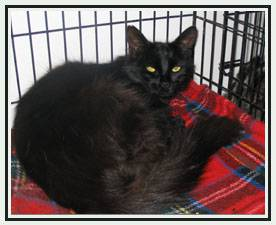

In [5]:

import PIL
import pathlib
temp_dir = pathlib.Path(train_dir)
cats = list(temp_dir.glob('cats/*'))
PIL.Image.open(str(cats[0]))

In [6]:
validation_dir = os.path.join(cwd, 'cats_and_dogs/validation')
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
print(total_val)

1001


In [7]:
test_dir = os.path.join(cwd, 'cats_and_dogs/test')
total_test = len(os.listdir(test_dir))
print(total_test)

51


In [8]:
!pwd

/home/chaudha4/Projects/pyprojects/jupyter-notebook


In [9]:
# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [10]:
# Notice that the test directory does not have any sub-directory cats/dogs. 

!ls $test_dir

10.jpg	15.jpg	1.jpg	24.jpg	29.jpg	33.jpg	38.jpg	42.jpg	47.jpg	5.jpg
11.jpg	16.jpg	20.jpg	25.jpg	2.jpg	34.jpg	39.jpg	43.jpg	48.jpg	6.jpg
12.jpg	17.jpg	21.jpg	26.jpg	30.jpg	35.jpg	3.jpg	44.jpg	49.jpg	7.jpg
13.jpg	18.jpg	22.jpg	27.jpg	31.jpg	36.jpg	40.jpg	45.jpg	4.jpg	8.jpg
14.jpg	19.jpg	23.jpg	28.jpg	32.jpg	37.jpg	41.jpg	46.jpg	50.jpg	9.jpg


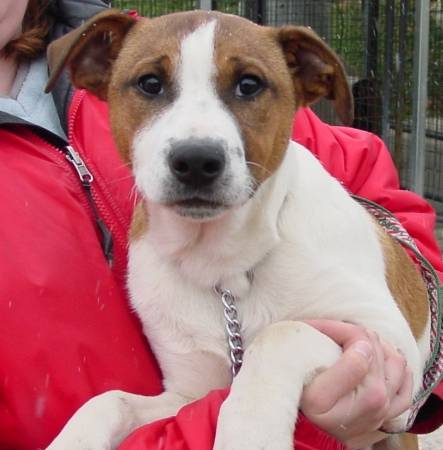

In [11]:
temp_dir = pathlib.Path(test_dir)
catsordogs = list(temp_dir.glob('*'))
PIL.Image.open(str(catsordogs[1]))

In [12]:
!ls $validation_dir

cats  dogs


Now it is your turn! Set each of the variables below correctly. (They should no longer equal `None`.)

Create image generators for each of the three image data sets (train, validation, test). Use `ImageDataGenerator` to read / decode the images and convert them into floating point tensors. Use the `rescale` argument (and no other arguments for now) to rescale the tensors from values between 0 and 255 to values between 0 and 1.

For the `*_data_gen` variables, use the `flow_from_directory` method. Pass in the batch size, directory, target size (`(IMG_HEIGHT, IMG_WIDTH)`), class mode, and anything else required. `test_data_gen` will be the trickiest one. For `test_data_gen`, make sure to pass in `shuffle=False` to the `flow_from_directory` method. This will make sure the final predictions stay is in the order that our test expects. For `test_data_gen` it will also be helpful to observe the directory structure.


After you run the code, the output should look like this:
```
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.
```

In [13]:
train_image_generator = None
validation_image_generator = None
test_image_generator = None

train_data_gen = None
val_data_gen = None
test_data_gen = None

### Keras models accept three types of inputs:

1. NumPy arrays, just like Scikit-Learn and many other Python-based libraries. This is a good option if your data fits in memory.
1. TensorFlow Dataset objects. This is a high-performance option that is more suitable for datasets that do not fit in memory and that are streamed from disk or from a distributed filesystem.
1. Python generators that yield batches of data (such as custom subclasses of the keras.utils.Sequence class).


In [22]:
# https://keras.io/api/preprocessing/image/#flowfromdirectory-method

train_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [36]:
# A DirectoryIterator yielding tuples of (x, y) where x is a numpy array containing a batch of 
# images with shape (batch_size, *target_size, channels) and y is a numpy array of corresponding labels.

for x, y in train_data_gen:
    print(x)
    print(y)
    break

[[[[0.427451   0.41960788 0.5058824 ]
   [0.93725497 0.9333334  0.9960785 ]
   [0.98823535 0.98823535 1.        ]
   ...
   [0.8588236  0.8862746  0.909804  ]
   [0.96470594 0.9843138  1.        ]
   [0.9725491  0.9921569  1.        ]]

  [[0.7607844  0.7568628  0.8196079 ]
   [0.9960785  0.9960785  1.        ]
   [0.9960785  1.         1.        ]
   ...
   [0.97647065 1.         1.        ]
   [0.9725491  1.         1.        ]
   [0.9803922  1.         1.        ]]

  [[0.9843138  0.98823535 1.        ]
   [0.9686275  0.9725491  0.9803922 ]
   [0.97647065 0.9843138  0.9803922 ]
   ...
   [0.9607844  1.         1.        ]
   [0.9725491  1.         1.        ]
   [0.95294124 0.9803922  1.        ]]

  ...

  [[0.7490196  0.7568628  0.75294125]
   [0.49411768 0.5019608  0.49803925]
   [0.43921572 0.44705886 0.4431373 ]
   ...
   [0.35686275 0.37647063 0.38823533]
   [0.41960788 0.43529415 0.43921572]
   [0.8588236  0.86666673 0.86274517]]

  [[0.50980395 0.5176471  0.5137255 ]
   [0.6

In [32]:
validation_image_generator = ImageDataGenerator(rescale=1./255)

val_data_gen = validation_image_generator.flow_from_directory(
    directory = validation_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [35]:
test_dir_top = os.path.join(cwd, 'cats_and_dogs')
! ls $test_dir_top

test_image_generator = ImageDataGenerator(rescale=1./255)

test_data_gen = test_image_generator.flow_from_directory(
    directory = test_dir_top,
    classes = ['test'],   # Will look for a "test" sub-directory only.
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = 1,
    shuffle=False,
    class_mode=None)

test  train  validation
Found 50 images belonging to 1 classes.


The `plotImages` function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the `train_data_gen` variable correctly, then running the cell below will plot five random training images.

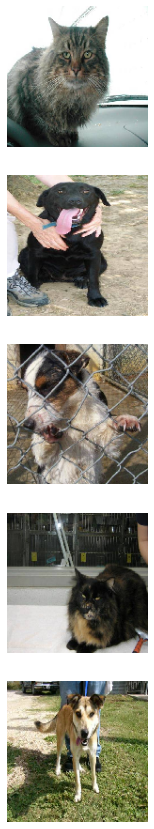

In [37]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Recreate the `train_image_generator` using `ImageDataGenerator`. 

Since there are a small number of training examples there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

Add 4-6 random transformations as arguments to `ImageDataGenerator`. Make sure to rescale the same as before.


In [38]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,    #Randomly flip inputs horizontally
    zoom_range=.25,          #Range for random zoom
    channel_shift_range=.4,  #Range for random channel shifts
    height_shift_range=2,
    width_shift_range=1,
    featurewise_center=True,
    
)


You don't have to do anything for the next cell. `train_data_gen` is created just like before but with the new `train_image_generator`. Then, a single image is plotted five different times using different variations.

Found 2000 images belonging to 2 classes.


/home/chaudha4/.local/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


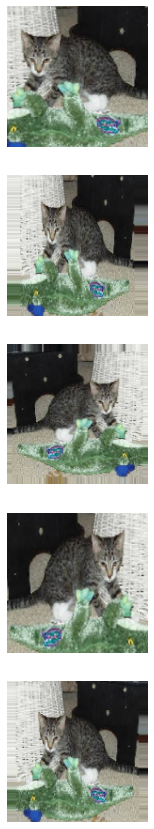

In [39]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In the cell below, create a model for the neural network that outputs class probabilities. It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

Compile the model passing the arguments to set the optimizer and loss. Also pass in `metrics=['accuracy']` to view training and validation accuracy for each training epoch.

In [51]:

model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))

model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))

model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))

model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])





In [52]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

In [49]:
# You can also visualize the entire network topology alongside output shapes using plot_model

!pip3 install pydot

tf.keras.utils.plot_model(model, show_shapes=True)


('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


Use the `fit` method on your `model` to train the network. Make sure to pass in arguments for `x`, `steps_per_epoch`, `epochs`, `validation_data`, and `validation_steps`.

In [53]:
history = None

epochs=10
history = model.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=epochs
)

Epoch 1/10
16/16 [==============================] - 39s 2s/step - loss: 0.7048 - accuracy: 0.5175 - val_loss: 0.6907 - val_accuracy: 0.5610
Epoch 2/10
16/16 [==============================] - 39s 2s/step - loss: 0.6868 - accuracy: 0.5360 - val_loss: 0.6729 - val_accuracy: 0.5350
Epoch 3/10
16/16 [==============================] - 38s 2s/step - loss: 0.6500 - accuracy: 0.6270 - val_loss: 0.6256 - val_accuracy: 0.6490
Epoch 4/10
16/16 [==============================] - 41s 3s/step - loss: 0.6250 - accuracy: 0.6515 - val_loss: 0.6494 - val_accuracy: 0.6040
Epoch 5/10
16/16 [==============================] - 39s 2s/step - loss: 0.5865 - accuracy: 0.7005 - val_loss: 0.5842 - val_accuracy: 0.6720
Epoch 6/10
16/16 [==============================] - 39s 2s/step - loss: 0.6061 - accuracy: 0.6625 - val_loss: 0.5933 - val_accuracy: 0.6710
Epoch 7/10
16/16 [==============================] - 39s 2s/step - loss: 0.5669 - accuracy: 0.7165 - val_loss: 0.5675 - val_accuracy: 0.6900
Epoch 8/10
16/16 [==

Run the next cell to visualize the accuracy and loss of the model.

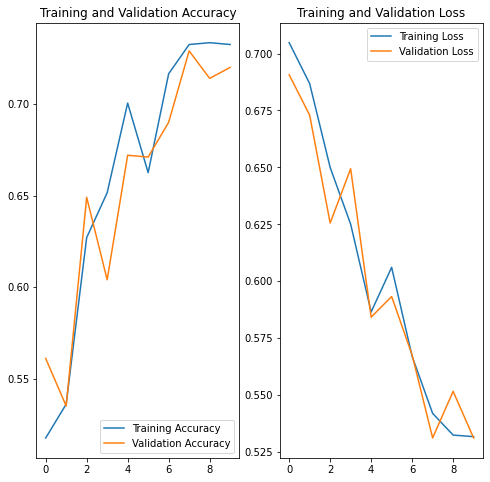

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In this final cell, get the probability that each test image (from `test_data_gen`) is a dog or a cat. `probabilities` should be a list of integers. 

Call the `plotImages` function and pass in the test images and the probabilities corresponding to each test image.

After your run the cell, you should see all 50 test images with a label showing the percentage sure that the image is a cat or a dog. The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


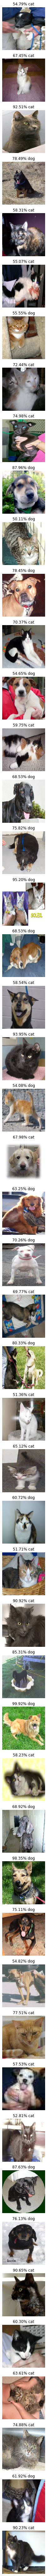

In [61]:
probabilities = model.predict(test_data_gen)
prediction = model.predict_classes(test_data_gen)
plotImages([test_data_gen[i][0] for i in range(50)],probabilities=probabilities,)

Run this final cell to see if you passed the challenge or if you need to keep trying.

In [62]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 0.76% of the images of cats and dogs.
You passed the challenge!
